---
### A One-Dimensional Regression Problem
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
#### I - Data Generation

We are working within a regression framework in one dimension, meaning that the input space is $ \mathcal{X} = \mathbb{R} $ and the output space is $ \mathcal{Y} = \mathbb{R} $. The predictors are therefore functions of the form $ f : \mathbb{R} \to \mathbb{R} $.

In this lab, we will not work with real data, but instead generate it ourselves. We consider the polynomial function:

$$
g(x) = \frac{3}{2}x^3 - x^2 - \frac{3}{4}x + 1
$$

which we will use to generate a sample of training data $ (X_i, Y_i)_{i \in [m]} $ i.i.d. according to:

$$
X_i \sim \text{Unif}([-1,1])
\qquad (2.1)
$$

$$
Y_i = g(X_i) + \frac{1}{20} \zeta_i
\qquad (2.2)
$$

where $ \zeta_i \sim \mathcal{N}(0,1) $ is independent of $ X_i $.

**Question 3.** — Define an array `x` containing $ m = 15 $ real numbers drawn uniformly from $ [-1,1] $. You should use the function `np.random.random_sample`.

In [2]:
m = 15
np.random.seed(17)

# x = 2 * np.random.random_sample(m) - 1  
# np.random.random_sample(m) generates `m` random numbers in the range [0, 1]
# Multiplying by 2 shifts the range to [0, 2]. Subtracting 1 shifts the range to [-1, 1].
# Cleaner and more explicit:
x = np.random.uniform(-1, 1, m)
x

array([-0.41066999,  0.06117351, -0.61695843, -0.86419928,  0.57397092,
        0.31266704,  0.27504179,  0.15120579, -0.92187417, -0.28437279,
        0.89136637, -0.87991064,  0.72808421,  0.75458105, -0.89761267])

**Question 4.** — Define an array `y` containing the values $ (Y_i)_{i \in [m]} $ defined according to (2.2). You should use the function `np.random.randn`.

In [3]:
def g(x):
   # Define the function g(x)
   return 1.5*x**3 - x**2 - 0.75*x + 1

# np.random.randn(m) generates `m` standard normal (mean=0, std=1) random values
# Multiplying by 0.05 scales the noise to have a standard deviation of 0.05
y = g(x) + 0.05 * np.random.randn(m)  

# `y` now contains the noisy observations of `g(x)`, simulating real-world data

**Question 5.** — Visualize the generated data $ (X_i, Y_i)_{i \in [m]} $ as blue points in the plane.

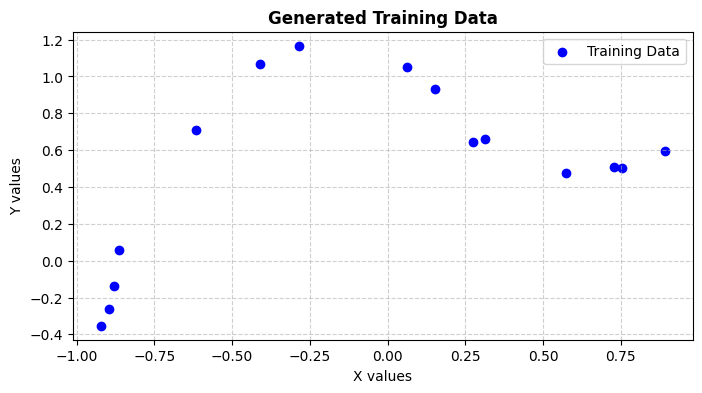

In [4]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='blue', label="Training Data")

plt.title("Generated Training Data", fontweight='bold')
plt.xlabel("X values")
plt.ylabel("Y values")

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**Question 6.** — Using the same procedure, generate a test sample $ (X'_i, Y'_i)_{i \in [m']} $ of size $ m' = 30 $, which will be stored in arrays `x_test` and `y_test`.

In [5]:
m_test = 30
x_test = np.random.uniform(-1, 1, m_test)
y_test = g(x_test) + 0.05 * np.random.randn(m_test)  

---
#### II - Linear Regression


We will use the `scikit-learn` library to construct predictors from the training data. In `scikit-learn`, each predictor has a `fit` function that specifies the training data, and a `predict` function that, once the predictor is trained, computes the predictor’s prediction on new inputs.

Here, we aim to construct the linear (i.e., affine) predictor that minimizes the least squares error. In other words, the class of predictors considered is:

$$
\mathcal{F} = \{ f_{a,b} : x \mapsto ax + b \}_{a,b \in \mathbb{R}},
$$

and we seek to compute the minimizer of the empirical risk for the loss function $ \ell(y,y') = (y - y')^2 $:

$$
\hat{f} = \arg \min_{f \in \mathcal{F}} \left\{ \sum_{i=1}^{m} \left( Y_i - f(X_i) \right)^2 \right\}.
$$

To do this, we will use the `LinearRegression` module, which we load as follows.

```python
from sklearn.linear_model import LinearRegression
f = LinearRegression()
```

We have initialized a linear regression predictor `f` above. We now need to provide the training data using the `f.fit` function. This function requires that the input data $(X_i)_{i \in [m]}$ be presented as a **2-dimensional array** with `m` rows (one per data point) and **1 column** (since the input space $\mathcal{X} = \mathbb{R}$ has dimension 1). However, `x` has only one dimension. Therefore, we will define `X` so that it contains the values of `x` in the correct format, and do the same for `x_test`:

```python
X = x[:, np.newaxis]
X_test = x_test[:, np.newaxis]
```

We can now specify the training data.

```python
f.fit(X, y)
```

If we write $\hat{f}(x) = \hat{a}x + \hat{b}$, the coefficients $\hat{a}$ and $\hat{b}$ of the predictor $\hat{f}$ are given by `f.coef_` and `f.intercept_`, respectively. The predictions of the predictor $\hat{f}$ on the training data and test data are given by:

```python
f.predict(X)
f.predict(X_test)
```

**Question 7.** — Produce a figure that overlays the points $ (X_i, Y_i)_{i \in [m]} $ with the line corresponding to the graph of the predictor $ \hat{f} $.

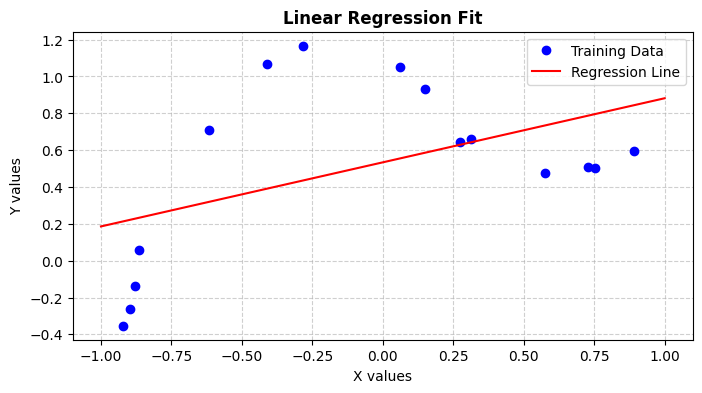

In [6]:
from sklearn.linear_model import LinearRegression
f_linreg = LinearRegression()

X = x[:, np.newaxis]            # Reshape x into a column vector
X_test = x_test[:, np.newaxis]  # Reshape x_test into a column vector
# Train the linear regression model
f_linreg.fit(X, y)

# Generate a set of x values for plotting the regression line
xplot = np.linspace(-1, 1, 500).reshape(-1,1)

plt.figure(figsize=(8, 4)) 
plt.plot(x, y, 'bo', label="Training Data")                      # Plot training data
plt.plot(xplot, f_linreg.predict(xplot), 'r', label="Regression Line")  # Plot regression line

plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression Fit", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Question 8.** — Calculate the average training error and the average test error. Comment.

In [7]:
# Compute the average training error (Mean Squared Error on training set)
train_error = np.mean((y - f_linreg.predict(X))**2)
# Compute the average test error (Mean Squared Error on test set)
test_error = np.mean((y_test - f_linreg.predict(X_test))**2)

print(f"Average Training Error: {train_error:.4f}.")
print(f"Average Test Error: {test_error:.4f}.")

Average Training Error: 0.1686.
Average Test Error: 0.1057.


$\rightarrow$ Linear regression does *not* seem like a good choice to fit this data.

---
#### III - Polynomial Regression

Let $ n \geq 1 $ be an integer. We now consider the least squares regression on polynomial functions of degree at most $ n $. In other words, we consider the class of predictors:

$$
\mathcal{F}_n^{\text{poly}} = \left\{ f_{a_0, \dots, a_n} : x \mapsto \sum_{k=0}^{n} a_k x^k \right\} , \quad (a_0, \dots, a_n) \in \mathbb{R}^{n+1}.
$$

We wish to compute the predictor:

$$
\hat{f} := \arg \min_{f \in \mathcal{F}_n^{\text{poly}}} \left\{ \sum_{i=1}^{m} \left( Y_i - f(X_i) \right)^2 \right\}.
$$

We will see that this problem can be reduced to a linear regression in dimension $ n $. Consider the map $ \psi : \mathbb{R} \to \mathbb{R}^n $ defined by:

$$
\psi(x) = (x, x^2, \dots, x^n).
$$

For coefficients $ (a_0, \dots, a_n) \in \mathbb{R}^{n+1} $, let $ \mathbf{a} = (a_1, \dots, a_n) \in \mathbb{R}^n $, and the corresponding polynomial $ f_{a_0, \dots, a_n} $ can then be written as:

$$
f_{a_0, \dots, a_n}(x) = \langle \psi(x), \mathbf{a} \rangle + a_0.
$$

Let $ \mathcal{X}' = \mathbb{R}^n $ and $ \mathcal{F}' $ be the class of linear (i.e., affine) predictors on $ \mathcal{X}' $ to $ \mathbb{R} $:

$$
\mathcal{F}' = \left\{ f'_{(a_0, \dots, a_n)} : (x_1, \dots, x_n) \mapsto \sum_{k=1}^{n} a_k x_k + a_0 \right\}.
$$

Let $ \hat{f'} $ be the predictor obtained by linear regression on the data $ (\psi(X_i), Y_i)_{i \in [m]} \in (\mathcal{X}' \times \mathbb{R})^m $:

$$
\hat{f'} = \arg \min_{f' \in \mathcal{F}'} \left\{ \sum_{i=1}^{m} \left( Y_i - f'(\psi(X_i)) \right)^2 \right\}.
$$

Then, we have the relationship:

$$
\hat{f} = \hat{f'} \circ \psi.
$$

In other words, polynomial regression (on $ \mathcal{X} = \mathbb{R} $) can be computed using linear regression in a higher dimension (on $ \mathcal{X}' = \mathbb{R}^n $).

**Question 9.** — In this question, we want to calculate the predictor $ \hat{f} $ for $ n = 2 $. We will implement the function $ \psi $ introduced above using tools provided by `scikit-learn`.

```python
from sklearn.preprocessing import PolynomialFeatures
psi = PolynomialFeatures(2, include_bias=False).fit_transform
```

- **(a)** Compute the predictor $ \hat{f} $ using `LinearRegression()`.
- **(b)** Overlay the graph of $ \hat{f} $ with the points representing the training data.
- **(c)** Calculate the average training and test errors, and compare them with the errors obtained in the previous section.

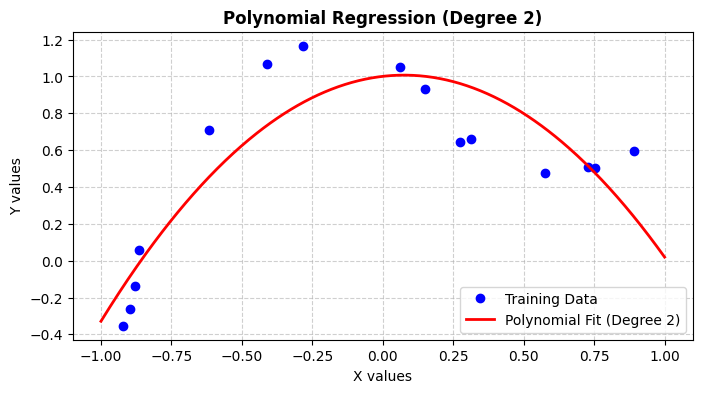

Average Training Error (Degree 2): 0.0491.
Average Test Error (Degree 2): 0.0437.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Define polynomial feature transformation (psi function) for degree 2
psi = PolynomialFeatures(2, include_bias=False).fit_transform
# Fit a polynomial regression model (degree 2) to the training data
f_poly = LinearRegression().fit(psi(X), y)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bo', label="Training Data")                                                        # Training data
plt.plot(xplot, f_poly.predict(psi(xplot)), 'r-', label="Polynomial Fit (Degree 2)")  # Regression curve
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression (Degree 2)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Compute training and test errors
train_error_2 = np.mean((y - f_poly.predict(psi(X)))**2)
test_error_2 = np.mean((y_test - f_poly.predict(psi(X_test)))**2)

print(f"Average Training Error (Degree 2): {train_error_2:.4f}.")
print(f"Average Test Error (Degree 2): {test_error_2:.4f}.")

$\rightarrow$ There is a clear improvement over linear regression.

**Question 10.** — Now we want to generalize the computation for any $ n \geq 1 $ (which corresponds to the maximal degree of the polynomials).

- **(a)** Inspired by the previous question, write a function that takes the integer $ n $ as an argument and returns two elements: the predictor $ \hat{f} $ and the function $ \psi $.
- **(b)** Compute the predictor for $ n \in \{3,10,14\} $ and visualize it (you may need to specify limits for the abscissa).
- **(c)** For $ n = 3 $, compare the coefficients of the predictor with those of the function $ g $ that generated the data.
- **(d)** What happens for $ n = 14 $?
- **(e)** Plot a figure with the abscissa $ n = 1, \dots, 14 $ and the ordinate the graphs of the average training and test errors. Comment.

In [9]:
# Function to perform polynomial regression for a given degree n
def reg_poly(n):
    """Fits a polynomial regression model of degree n."""
    psi = PolynomialFeatures(n, include_bias=False).fit_transform  # Polynomial feature transformation
    return LinearRegression().fit(psi(X), y), psi

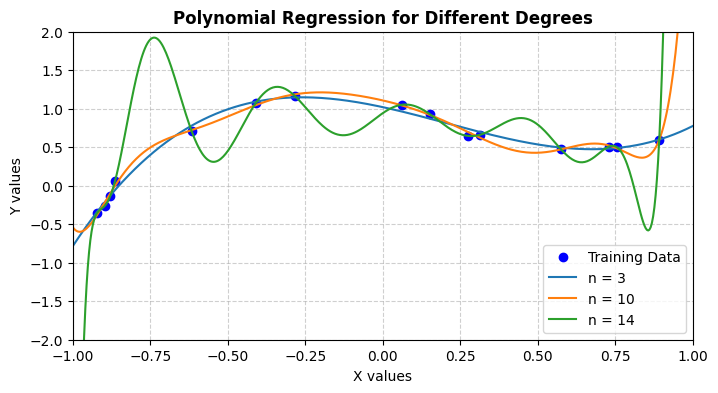

Intercept for n=3: 1.0203
Coefficients for n=3: [-0.87015964 -1.0231925   1.64947796]


In [10]:
# Define degrees to test
degrees = [3, 10, 14]

# Initialize dictionaries to store models and psi transformations
poly = {}
psi = {}

# Plot training data
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bo', label="Training Data")

# Fit polynomial models for different degrees and plot the results
for n in degrees:
    poly[n], psi[n] = reg_poly(n)                                      # Train model
    plt.plot(xplot, poly[n].predict(psi[n](xplot)), label=f"n = {n}")  # Plot polynomial fit

plt.axis([-1, 1, -2, 2])
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression for Different Degrees", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

print(f"Intercept for n=3: {poly[3].intercept_:.4f}")
print(f"Coefficients for n=3: {poly[3].coef_}")

- For $n=3$, these coefficients are similar to those of the function $g$.
- For $n=14$, there is a polynomial that passes through all 15 points (Lagrange interpolation polynomial). This polynomial obviously minimizes the empirical risk, so it's the one given by the empirical risk minimization.

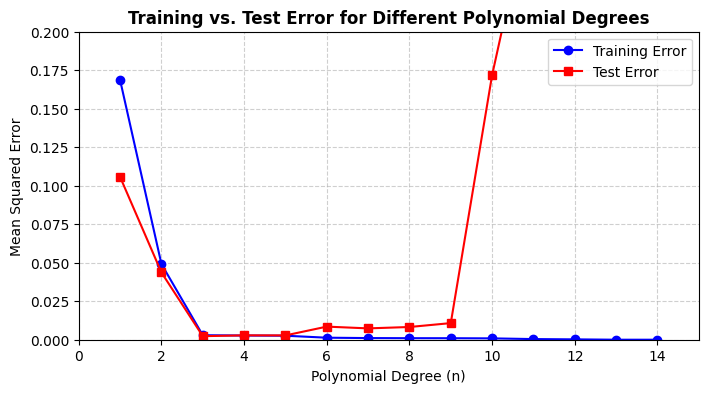

In [11]:
# Compute training and test errors for different polynomial degrees (1 to 14)
mean_train_error = []
mean_test_error = []

# Loop through degrees and compute errors
for n in range(1, 15):
    f_poly, psi = reg_poly(n)                                          # Fit polynomial model
    train_error = np.mean((f_poly.predict(psi(X)) - y) ** 2)           # Training error
    test_error = np.mean((f_poly.predict(psi(X_test)) - y_test) ** 2)  # Test error
    mean_train_error.append(train_error)
    mean_test_error.append(test_error)

# Plot training and test errors
plt.figure(figsize=(8, 4))
plt.plot(range(1, 14 + 1), mean_train_error, 'b-o', label="Training Error")
plt.plot(range(1, 14 + 1), mean_test_error, 'r-s', label="Test Error")
plt.xlabel("Polynomial Degree (n)")
plt.ylabel("Mean Squared Error")
plt.title("Training vs. Test Error for Different Polynomial Degrees", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.axis([0, 14 + 1, 0, 0.2])
plt.show()

- As $n$ increases, the polynomial model becomes more complex, leading to a lower training error.
- Initially, the test error decreases, indicating a better fit. However, for large $n$, the test error starts increasing, which signifies overfitting.
- High-degree polynomials can fit the training data very well, but they lose the ability to generalize to new data, leading to poor performance on unseen points.

---
#### IV - LASSO Regularization

We now consider polynomial regression with least squares and **LASSO regularization**:

$$
\hat{f} = \arg \min_{f \in \mathcal{F}_n^{\text{poly}}} \left\{ \frac{1}{2m} \sum_{i=1}^{m} (Y_i - f(X_i))^2 + \alpha \sum_{k=1}^{n} |a_k| \right\},
$$

where $ \alpha > 0 $ is a parameter to be chosen.

With `sklearn`, we initialize a **linear regression** with **LASSO regularization** as follows:

```python
from sklearn.linear_model import Lasso
f = Lasso(0.1)
```

where the argument corresponds to the choice of the $ \alpha $ parameter.

**Question 11.** — Inspired by the previous section, compute for $ n = 14 $, polynomial regression with **LASSO regularization** for different values of the parameter (e.g., $ \alpha \in \{10^{-6}, 10^{-5}, \dots, 10^{-1}, 1\} $), and visualize the results. What do we observe about the obtained polynomials? About their coefficients? Their degrees?

In [12]:
from sklearn.linear_model import Lasso

# Function to perform polynomial regression with LASSO regularization for a given degree n and alpha value
def reg_poly_lasso(n, alpha=1):
    """Fits a polynomial regression model of degree n using LASSO regularization."""
    psi = PolynomialFeatures(n, include_bias=False).fit_transform  # Polynomial feature transformation
    return Lasso(alpha).fit(psi(X), y), psi                        # Train LASSO model and return it with psi transformation

Alpha: 1e-06 | Coefficients: [-0.98478647 -2.12791626  2.10052609  2.43507169 -0.01884277 -0.45393398
 -0.71453534 -0.92267548 -0.2883314  -0.56429789  0.2342889  -0.075126
  0.61544027  0.3329498 ]
Alpha: 1e-05 | Coefficients: [-0.97967347 -2.08715873  2.07667687  2.24658643 -0.09270945 -0.37748433
 -0.53323336 -0.66194248 -0.08699821 -0.42110244  0.02799899 -0.20600846
  0.43265081  0.        ]
Alpha: 1e-04 | Coefficients: [-0.92487936 -1.66982296  1.8304738   1.13242295 -0.          0.
 -0.19407374 -0.         -0.         -0.         -0.         -0.79613831
 -0.         -0.19957959]
Alpha: 1e-03 | Coefficients: [-0.79158108 -1.0145155   1.47550605 -0.          0.08059257 -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.        ]
Alpha: 1e-02 | Coefficients: [-0.14961023 -0.92710817  0.         -0.          0.82345241 -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.        ]
Alpha: 1e-01 | Coefficients: [ 0.0727

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.540e-03, tolerance: 3.272e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.835e-03, tolerance: 3.272e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

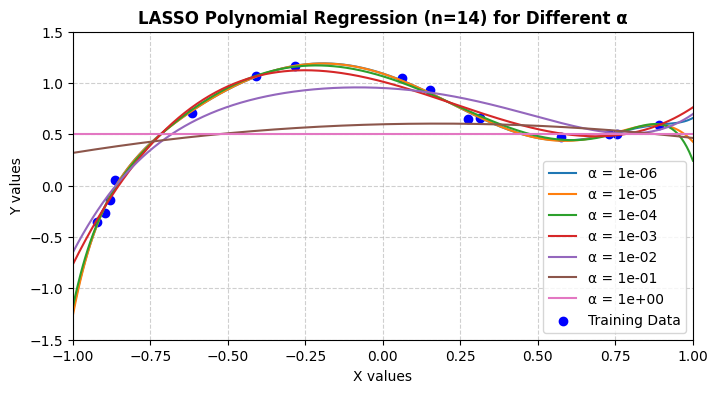

In [13]:
# Define alpha values to test (log scale from 10⁻⁶ to 1)
alpha_values = [10**a for a in range(-6, 1)]

# Loop through different alpha values and fit LASSO-regularized polynomial regression
plt.figure(figsize=(8, 4))
for alpha in alpha_values:
    f_lasso, psi = reg_poly_lasso(14, alpha)  # Train LASSO polynomial regression for n=14
    plt.plot(xplot, f_lasso.predict(psi(xplot)), label=f"α = {alpha:.0e}")  # Plot polynomial fit
    # Print coefficients to observe LASSO's effect on sparsity
    print(f"Alpha: {alpha:.0e} | Coefficients: {f_lasso.coef_}")

plt.scatter(x, y, color='blue', label="Training Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("LASSO Polynomial Regression (n=14) for Different α", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.axis([-1, 1, -1.5, 1.5])
plt.show()

For large $\alpha$ values, LASSO forces many polynomial coefficients to be zero, reducing model complexity.
This limits overfitting but may lead to underfitting if $\alpha$ is too large.

**Question 12.** — Plot the training and test errors for the different values of $ \alpha $ (we will use a logarithmic scale on the abscissa to improve readability). Comment.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.540e-03, tolerance: 3.272e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.835e-03, tolerance: 3.272e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

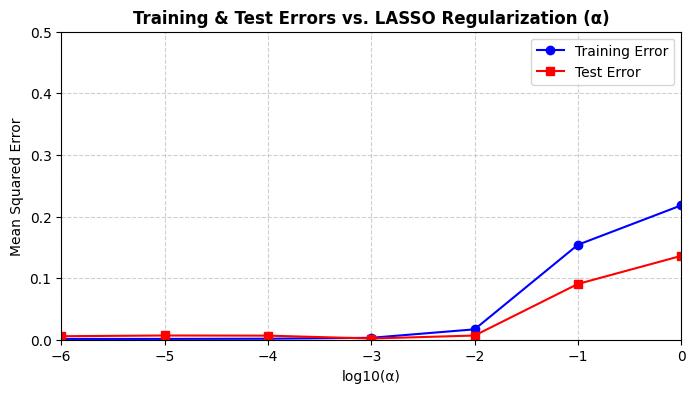

In [14]:
# Initialize lists to store errors and nonzero coefficients
mean_train_error = []
mean_test_error = []
nonzero_coefficients = []

# Loop through different α values and compute training & test errors
for alpha in alpha_values:
    # Train LASSO polynomial regression for n=14
    f_lasso, psi = reg_poly_lasso(14, alpha)

    # Compute Mean Squared Error (MSE) for training and test sets
    train_error = np.mean((f_lasso.predict(psi(X)) - y) ** 2)
    test_error = np.mean((f_lasso.predict(psi(X_test)) - y_test) ** 2)
    
    # Store results
    mean_train_error.append(train_error)
    mean_test_error.append(test_error)
    
    # Count nonzero coefficients to analyze sparsity
    nonzero_coefficients.append(np.sum(f_lasso.coef_ != 0))

# Plot Training and Test Errors vs. log10(α)
plt.figure(figsize=(8, 4))
plt.plot(np.log10(alpha_values), mean_train_error, 'b-o', label="Training Error")
plt.plot(np.log10(alpha_values), mean_test_error, 'r-s', label="Test Error")
plt.xlabel("log10(α)")
plt.ylabel("Mean Squared Error")
plt.title("Training & Test Errors vs. LASSO Regularization (α)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.axis([-6, 0, 0, 0.5])  # Set x-axis range for log10(α) values
plt.show()

The parameter $\alpha$ plays a role similar to $n$ in Question 10, but in the opposite direction:
- As $\alpha$ decreases, the obtained polynomials become increasingly complex, leading to lower training error.
- However, when $\alpha$ is too small, the test error starts increasing again due to overfitting.